In [1]:
import numpy
import scipy.integrate
import scipy.optimize
import matplotlib.pyplot as plt

In [11]:
def beam_plot(path_dir='', axis='x', dirc='ccw', param0=[]):
    bar = 5 
    file = path_dir.split('_')[2]
    d = numpy.loadtxt('../../data/'+path_dir+'/{0}_{1}_{2}.csv'.format(
        file, axis, dirc), delimiter=',')
    t = d[:,0]
    x = d[:,1]
    y = d[:,2]

    def _fitting_function(param, x, y):
        def _function(x):
            return param[0] * numpy.exp(-2 * (x - param[1])**2 / param[2]**2) + param[3]
        
        _y = [scipy.integrate.quad(_function, i-bar/2, i+bar/2)[0] for i in x]
        residual = y - _y
        return residual
    
    def fitting_function(x):
        def function(x):
            return param[0][0] * numpy.exp( -2 * (x - param[0][1])**2 / param[0][2]**2) + param[0][3]
        
        ret = [scipy.integrate.quad(function, i-bar/2, i+bar/2)[0] for i in x]
        return ret
    
    param = scipy.optimize.leastsq(_fitting_function, param0, args=(x, y))
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, fitting_function(x), color='orange', linewidth=2, label='Gaussian')
    plt.plot(x, y, color='dodgerblue', linewidth=0, marker='.',
            markersize=9, markeredgecolor='dodgerblue', label='Measure')
    plt.xlabel('{0}-axis (mm)'.format(axis), size=20)
    plt.ylabel('Power (dBm)', size=20)
    plt.tick_params(labelsize=16)
    plt.grid(True)
    plt.legend(loc='upper right', fontsize=18)
    plt.text(0, min(fitting_function(x))+1.20,
             '{0}c={1:.3f}'.format(axis, param[0][1]), fontsize=20)
    plt.text(0, min(fitting_function(x))+1,
             'Beamsize={0:.3f}'.format(param[0][2]), fontsize=20)
    plt.title('BeamPattern Measurement \n {0}_{1}_{2}'.format(file, axis, dirc), size=24)
    plt.savefig('../../data/'+path_dir+'/{0}_{1}_{2}.png'.format(file, axis, dirc))
    plt.show()

In [16]:
path_dir = 'data_at_20180501-213412'

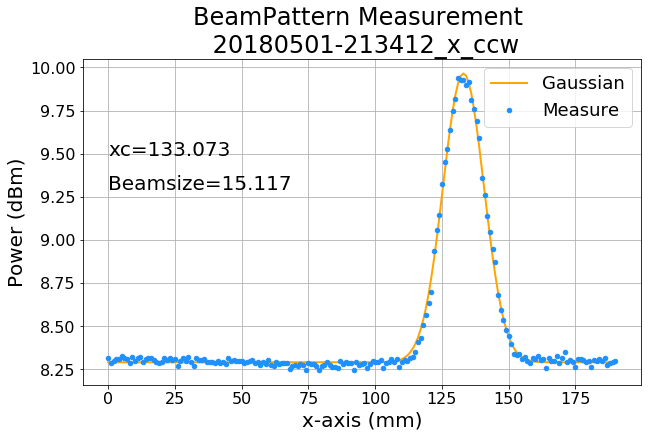

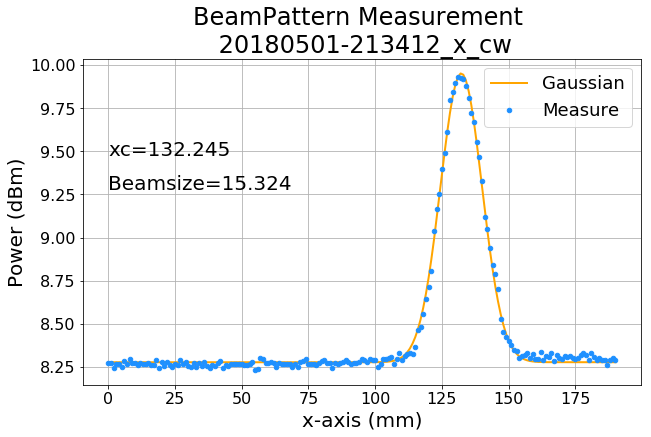

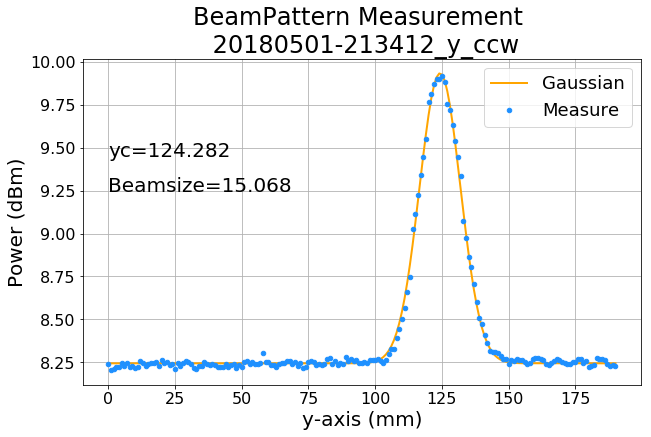

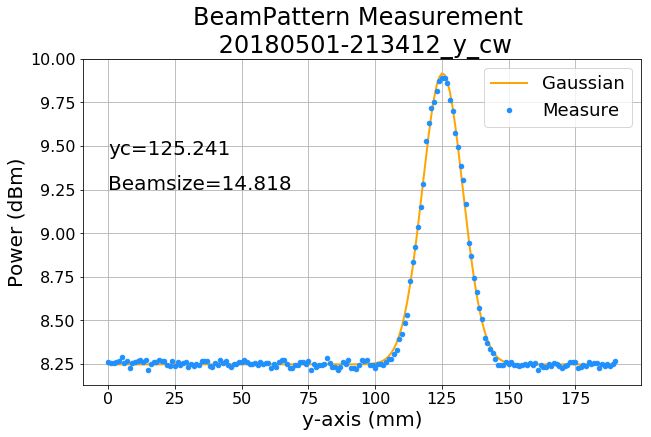

In [18]:
# x-ccw
beam_plot(path_dir, axis='x', dirc='ccw', param0=[1.5, 130, 14, 10])
# x-cw
beam_plot(path_dir, axis='x', dirc='cw', param0=[1.5, 130, 14, 10])
# y-ccw
beam_plot(path_dir, axis='y', dirc='ccw', param0=[1.5, 120, 14, 10])
# y-cw
beam_plot(path_dir, axis='y', dirc='cw', param0=[1.5, 120, 14, 10])

#### 